In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#user may not have watched all movies so we fill those unrated value
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#since unrated value returns NaN, we replace it with zeroes
# final_dataset.fillna(0,inplace=NaN)

final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#removing noise
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
no_user_voted.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

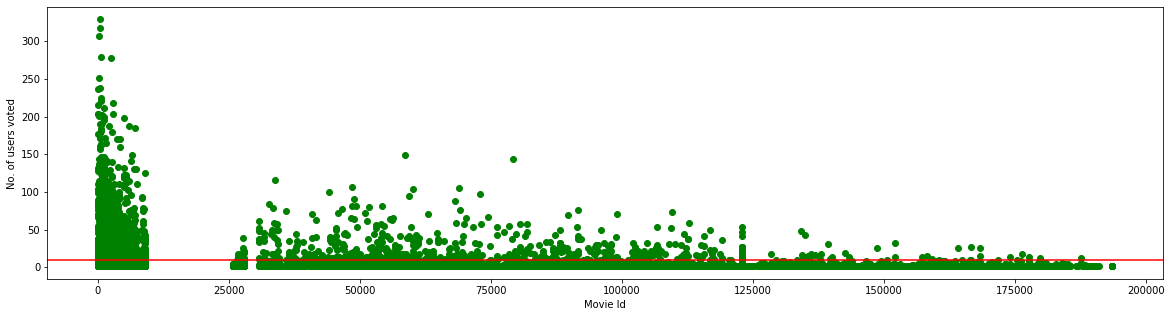

In [14]:
f,ax = plt.subplots(1,1,figsize=(20,5))

plt.scatter(no_user_voted.index,no_user_voted,color='green')
plt.axhline(y=10,color='r') #considering no_user_voted = 10 as threshold
plt.xlabel('Movie Id')
plt.ylabel('No. of users voted')
plt.show()

In [15]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

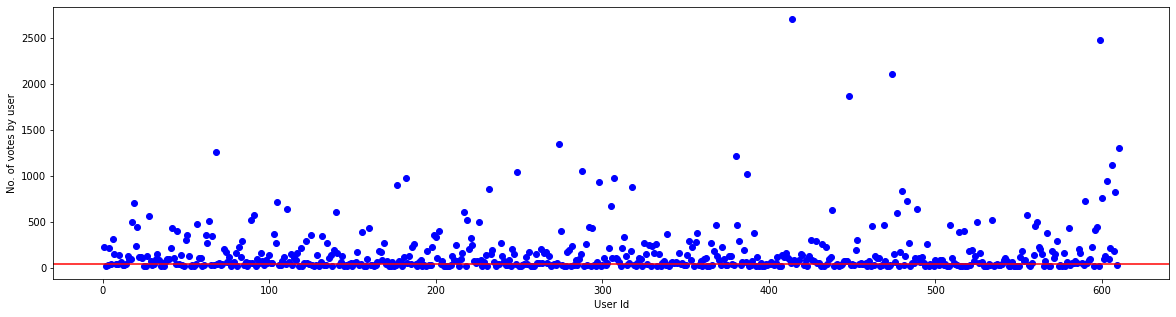

In [16]:
f,ax = plt.subplots(1,1,figsize=(20,5))
plt.scatter(no_movies_voted.index,no_movies_voted,color='blue')
plt.axhline(y=50,color='r') #considering no_movies_voted = 50 as threshold
plt.xlabel('User Id')
plt.ylabel('No. of votes by user')
plt.show()

In [17]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
csr_data = csr_matrix(final_dataset.values)

#removing sparsity as there are so many noises 
final_dataset.reset_index(inplace=True)

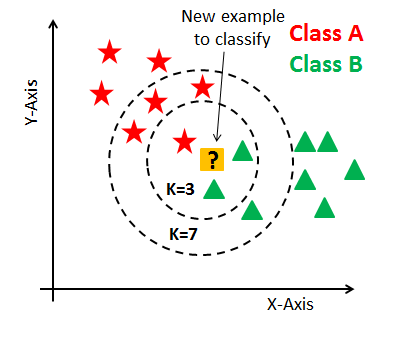

In [93]:
#recommender system
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

from IPython.display import Image
Image("KNN.png")

In [94]:
def get_recommendations(movie_name):
    
    n_movies_to_reccomend = 10

    # taking the entire row
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    print(movie_list)
   
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx], n_neighbors = n_movies_to_reccomend + 1)
        distance_list = distances.squeeze().tolist()
        indice_list = indices.squeeze().tolist()
        distance_indice_zipped = zip(indice_list, distance_list)
        distance_indice_zipped_list = list(distance_indice_zipped)
    
        #sorting in descending order based on distance
        recommended_mov_indices = sorted(distance_indice_zipped_list, key = lambda x: x[1])[:0:-1]
    
        recommend_list = []
        
        for val in recommended_mov_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index

            recommend_list.append({'Title':movies.iloc[idx]['title'].values[0],
                                   'Genre':movies.iloc[idx]['genres'].values[0],
                                   'Distance':val[1]})
            
        df = pd.DataFrame(recommend_list,index = range(1, n_movies_to_reccomend + 1))
        return df
    
    else:
        return "No movie is found"

In [95]:
get_recommendations('Iron Man')

      movieId                                  title  \
6743    59315                        Iron Man (2008)   
7324    77561                      Iron Man 2 (2010)   
8142   102007        Invincible Iron Man, The (2007)   
8151   102125                      Iron Man 3 (2013)   
9058   142056  Iron Man & Hulk: Heroes United (2013)   
9444   167296                        Iron Man (1931)   

                                     genres  
6743                Action|Adventure|Sci-Fi  
7324  Action|Adventure|Sci-Fi|Thriller|IMAX  
8142                              Animation  
8151            Action|Sci-Fi|Thriller|IMAX  
9058             Action|Adventure|Animation  
9444                                  Drama  


,Title,Genre,Distance
1,Wanted (2008),Action|Thriller,1.638573e-07
2,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,1.619484e-07
3,Harold & Kumar Escape from Guantanamo Bay (2008),Adventure|Comedy,1.603542e-07
4,Forgetting Sarah Marshall (2008),Comedy|Romance,1.592076e-07
5,Hancock (2008),Action|Adventure|Comedy|Crime|Fantasy,1.551593e-07
6,"Incredible Hulk, The (2008)",Action|Sci-Fi,1.442738e-07
7,Indiana Jones and the Kingdom of the Crystal S...,Action|Adventure|Comedy|Sci-Fi,1.414663e-07
8,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,1.397953e-07
9,Taken (2008),Action|Crime|Drama|Thriller,1.339826e-07
10,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX,1.164248e-07


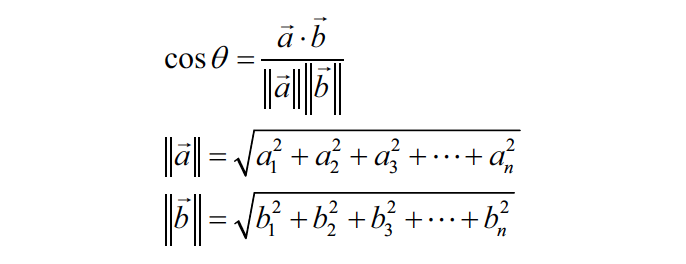

In [96]:
#as this recommendation is based on cosine similarity (KNN has it as built-in), implementing necessary functions to build from scratch 

Image("cosine_similarity.png")

# !["title"](cosine_similarity.png)

In [97]:
#cosine similarity implementation 

from math import *

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])), 3)

def cosine_similarity(x, y):
    numerator = sum(a*b for a,b in zip(x, y))
    denominator = square_rooted(x) * square_rooted(y)
    return round(numerator/ float(denominator), 3)

print(cosine_similarity([4,31,38,33],[15,52,53,75]))

0.976
